In [1]:

import jax.numpy as jnp
from jax import debug
from jax import grad
import jax
import math
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

# I figure out the kernel stuff

In [ ]:
img = Image.open("aventurine.jpeg")
img_arr = np.array(img)
img_arr = img_arr/ 255 #stick it between 0 and 1
plt.imshow(img_arr) # My favorite honkai star rail character as a tester image


In [ ]:
def convolve(img, kernel):
    #img, kernel are both np arrays.
    #Assumes NHWC (batch, height, width, channels)
    #my first attempt of the convolve fxn (this was before I learned einsum)
    if(len(img.shape) == 3):
        img = np.expand_dims(img, 0)
    b, h, w, c = img.shape 
    offset = kernel.shape[0] // 2 
    
    ret_shape = [h - 2 * offset, w - 2 * offset, c]
    
    ret = np.zeros(ret_shape)
    
    for i in range(offset,h- offset): #its over rows first
        for j in range(offset,w- offset):
            ret[i - offset, j - offset] = np.sum(img[0, i - offset: i + offset + 1,j - offset : j + offset + 1,:] * kernel[:,:,None], axis=(0,1))
    return ret    

In [ ]:
sobel_left = np.array([[-1, 0, 1], 
                       [-2, 0, 2],
                       [-1, 0, 1]]).reshape(3,3)

In [ ]:
convolved = convolve(img_arr, sobel_left) #this be slow. LIke very slow. Be patient with it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


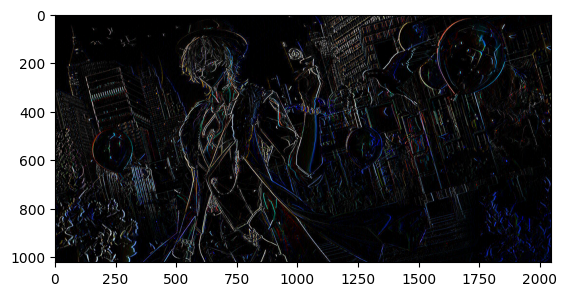

In [ ]:
plt.imshow(convolved) #wow it actually worked.

# Dataset Getting

In [ ]:
import keras
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz", )

def batch(x, y, batch_size=64):
    if len(x) % batch_size != 0:
        x = x[:batch_size * (len(x)//batch_size)]
        y=y[:batch_size*(len(x)//batch_size)]
    return np.array(np.split(x, int(len(x) / batch_size), axis=0)), np.split(y, int(len(y)/batch_size), axis=0)

def fix_data(x, y):
    x = x.reshape(x.shape[0], 28*28)/255
    test = np.zeros((x.shape[0], 10))
    test[np.arange(x.shape[0]),y] = 1
    return (x, test)

fixed_x, fixed_y = fix_data(x_train, y_train)
b_x , b_y = batch(fixed_x[:10000], fixed_y[:10000], 64)


# Run the CNN

NameError: name 'jaxmodel' is not defined

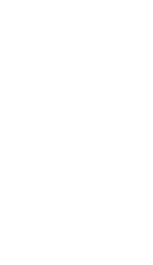

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from CNN import *
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = jaxmodel.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine {jnp.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()


In [7]:
kernel_sizes = [5, 3,3]
kernel_filters = [4, 8, 8]
params = {"kernel_info" : list(zip(kernel_sizes, kernel_filters)), "input_shape": (28, 28, 1), "output_size": 10}
b_x = b_x.reshape(b_x.shape[0], b_x.shape[1], 28, 28, 1)
b_x_for_test = b_x[0].reshape(b_x.shape[1], 28, 28, 1)
b_y = jnp.array(b_y)

In [8]:
plswork = Model(params)
for i in range(20):
    plswork.train_epoch(b_x, b_y, lr=1e-2)
    # plswork.print_layer_info() 


Acc: 0.6930 Loss: 1.1322
Acc: 0.8850 Loss: 0.5184
Acc: 0.8993 Loss: 0.4583


KeyboardInterrupt: 